# Import thư viện

In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import seaborn as sns

# Đọc file

In [545]:
filename = "C:\\Users\\huyhi\\Downloads\\Mall_Customers.csv"
data = pd.read_csv(filename)
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


# Phân tích dataset

In [514]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [515]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0, 0.5, 'Số lượng')

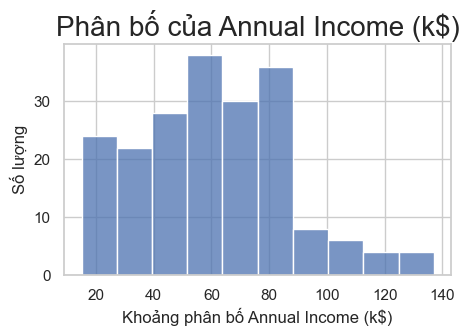

In [516]:
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(data['Annual Income (k$)'])
plt.title('Phân bố của Annual Income (k$)', fontsize = 20)
plt.xlabel('Khoảng phân bố Annual Income (k$)')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

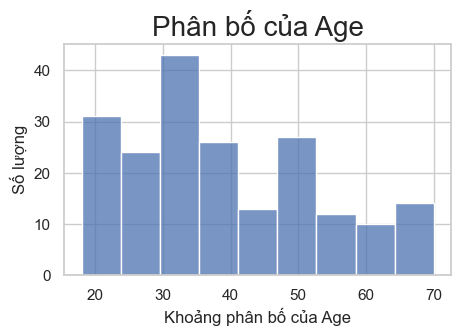

In [517]:
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(data['Age'])
plt.title('Phân bố của Age', fontsize = 20)
plt.xlabel('Khoảng phân bố của Age')
plt.ylabel('Số lượng')

Text(0, 0.5, 'Số lượng')

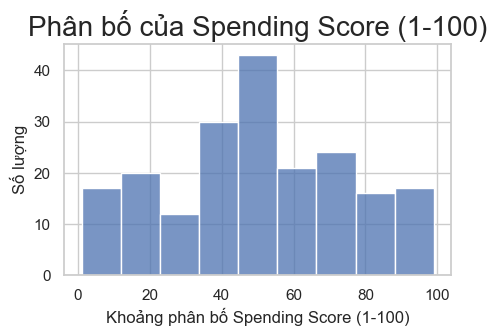

In [518]:
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(data['Spending Score (1-100)'])
plt.title('Phân bố của Spending Score (1-100)', fontsize = 20)
plt.xlabel('Khoảng phân bố Spending Score (1-100)')
plt.ylabel('Số lượng')

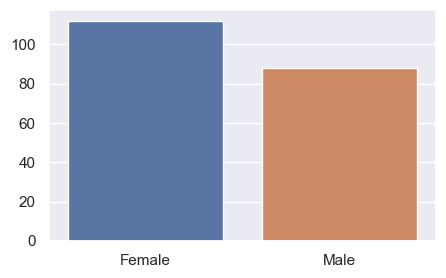

In [519]:
genders = data.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (5,3))
sns.barplot(x = genders.index, y=genders.values)
plt.show()

# Khởi tạo mô hình

In [546]:
def kmeans_init_centers(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def kmeans_assign_labels(X, centers):
    D = cdist(X, centers,)
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        Xk = X[labels == k, :]
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))
    
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []

    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
    return (centers[-1], labels[-1])

def Cal_error(X, K):
    error = 0
    X = X.values
    (centers, labels) = kmeans(X, K)
    centers = np.array(centers)
    for i in range(len(centers)):
        x = X[labels == i]
        for p in x:
            error += (p[0] - centers[i, 0])**2 + (p[1] - centers[i, 1])**2
    return error

# Thuật toán sử dụng hai đặc trưng Annual Income và Spending Score

Thuật toán K-Means sẽ được thực thi với hai đặc trưng của bộ dữ liệu là Annual Income (k$) và Spending Score (1-100)

In [521]:
df1=data[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Phân bố của hai đặc trưng

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


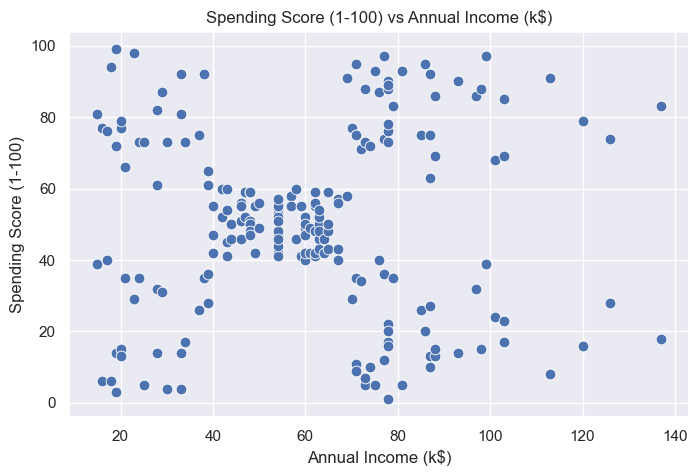

In [522]:
plt.figure(figsize = (8, 5))
sns.scatterplot(X['Annual Income (k$)'],X['Spending Score (1-100)'], s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# Phương pháp Elbow

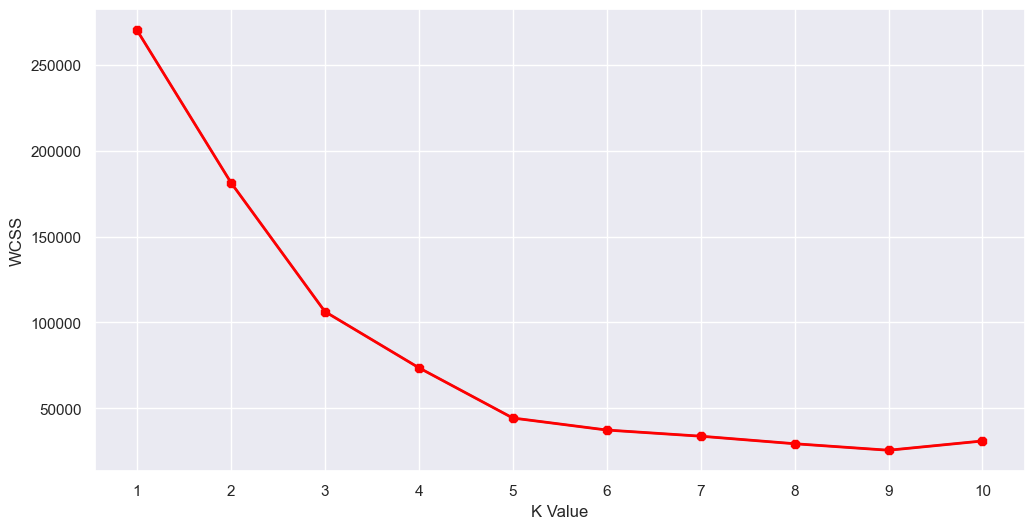

In [383]:
wcss = []
for i in range(1, 11):
    wcss.append(Cal_error(X,i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11),wcss)
plt.plot(range(1, 11),wcss, linewidth = 2, color = "red", marker = "8")
plt.xlabel("K Value")
plt.xticks(np.arange(1, 11, 1))
plt.ylabel("Error")
plt.show()

Dựa vào phương pháp elbow có thể xác định giá trị K tối ưu là 5 do đường cong không còn dốc xuống sau điểm này nữa

In [523]:
K = 5
X = X.values
(centers, labels) = kmeans(X,K)
df1["Cluster"] = labels
centers

array([[25.72727273, 79.36363636],
       [55.0875    , 49.7125    ],
       [86.53846154, 82.12820513],
       [87.75      , 17.58333333],
       [26.30434783, 20.91304348]])

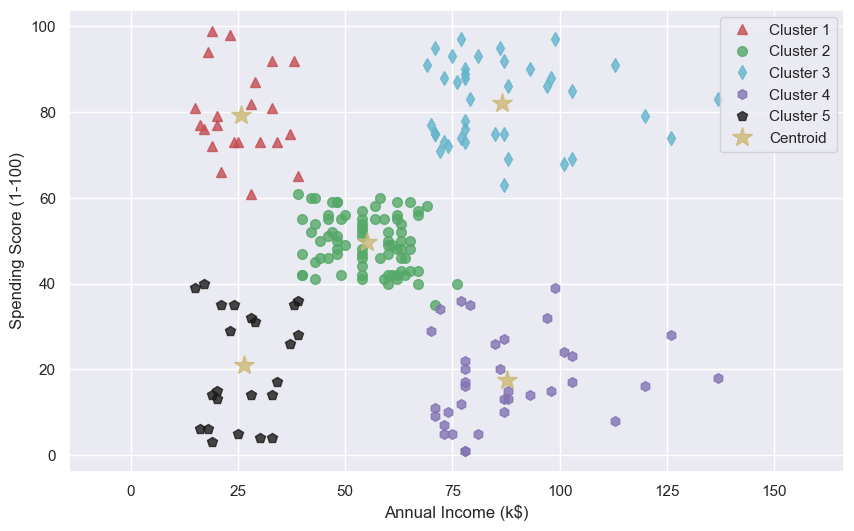

In [524]:
def kmeans_display1(X, label,center):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    X4 = X[label == 4, :]
    plt.figure(figsize=(10,6))
    plt.plot(X0[:, 0], X0[:, 1], 'r^', markersize = 7, alpha = .8,label = "Cluster 1")
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 7, alpha = .8,label = "Cluster 2")
    plt.plot(X2[:, 0], X2[:, 1], 'cd', markersize = 7, alpha = .8,label = "Cluster 3")
    plt.plot(X3[:, 0], X3[:, 1], 'mh', markersize = 7, alpha = .8,label = "Cluster 4")
    plt.plot(X4[:, 0], X4[:, 1], 'kp', markersize = 7, alpha = .8,label = "Cluster 5")
    plt.plot(center[:, 0], center[:, 1], 'y*', markersize = 15, alpha = .8,label = "Centroid")
    plt.axis('equal')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)') 
    plt.plot()
    plt.legend()
    plt.show()
    
kmeans_display1(X, labels,centers)

#  Xét cụm 1

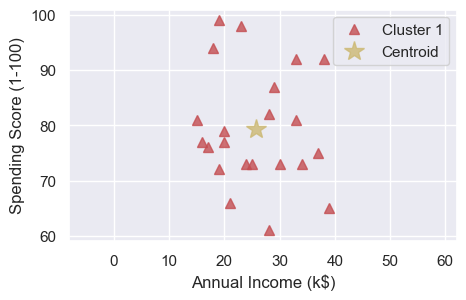

In [525]:
X0 = X[labels == 0, :]
plt.figure(figsize = (5,3))
plt.plot(X0[:, 0], X0[:, 1], 'r^', markersize = 7, alpha = .8,label = "Cluster 1")
plt.plot(centers[0, 0], centers[0, 1], 'y*', markersize = 15, alpha = .8,label = "Centroid")
plt.axis('equal')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.plot()
plt.legend()
plt.show()

Text(0, 0.5, 'Số lượng')

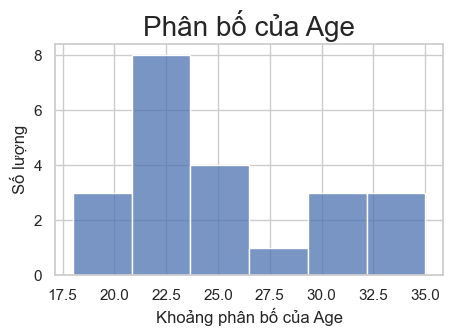

In [526]:
X0 = df1[df1['Cluster'] == 0]
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(X0['Age'])
plt.title('Phân bố của Age', fontsize = 20)
plt.xlabel('Khoảng phân bố của Age')
plt.ylabel('Số lượng')

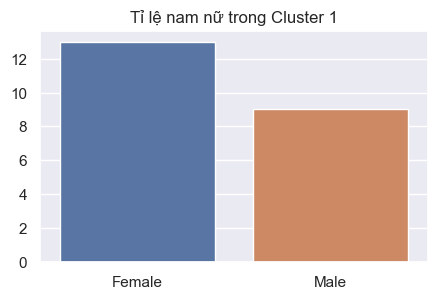

In [527]:
genders = X0.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (5,3))
sns.barplot(x = genders.index, y=genders.values)
plt.title("Tỉ lệ nam nữ trong Cluster 1")
plt.show()

# Xét cụm 2

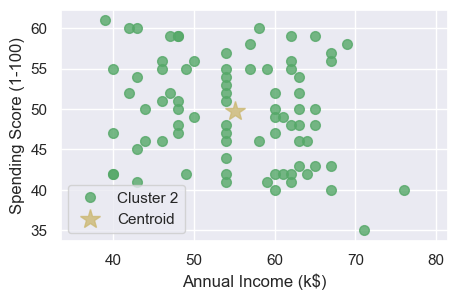

In [528]:
X1 = X[labels == 1, :]
plt.figure(figsize=(5,3))
plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 7, alpha = .8,label = "Cluster 2")
plt.plot(centers[1, 0], centers[1, 1], 'y*', markersize = 15, alpha = .8,label = "Centroid")
plt.axis('equal')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.plot()
plt.legend()
plt.show()

Text(0, 0.5, 'Số lượng')

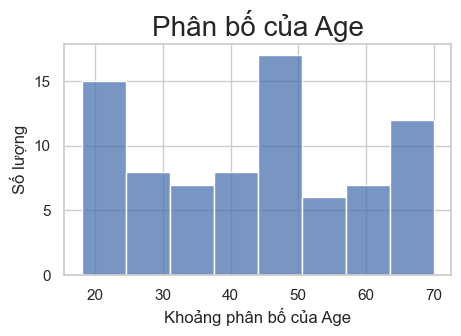

In [530]:
X1 = df1[df1['Cluster'] == 1]
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(X1['Age'])
plt.title('Phân bố của Age', fontsize = 20)
plt.xlabel('Khoảng phân bố của Age')
plt.ylabel('Số lượng')

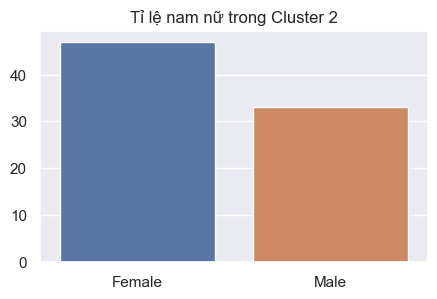

In [531]:
genders = X1.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (5,3))
sns.barplot(x = genders.index, y=genders.values)
plt.title("Tỉ lệ nam nữ trong Cluster 2")
plt.show()

# Xét cụm 3

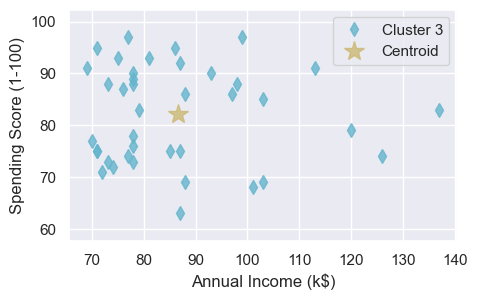

In [532]:
X2 = X[labels == 2, :]
plt.figure(figsize = (5,3))
plt.plot(X2[:, 0], X2[:, 1], 'cd', markersize = 7, alpha = .8,label = "Cluster 3")
plt.plot(centers[2, 0], centers[2, 1], 'y*', markersize = 15, alpha = .8,label = "Centroid")
plt.axis('equal')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.plot()
plt.legend()
plt.show()

Text(0, 0.5, 'Số lượng')

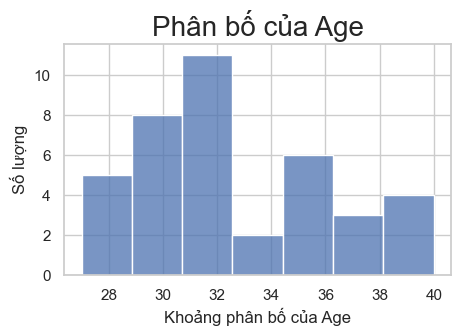

In [533]:
X2 = df1[df1['Cluster'] == 2]
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(X2['Age'])
plt.title('Phân bố của Age', fontsize = 20)
plt.xlabel('Khoảng phân bố của Age')
plt.ylabel('Số lượng')

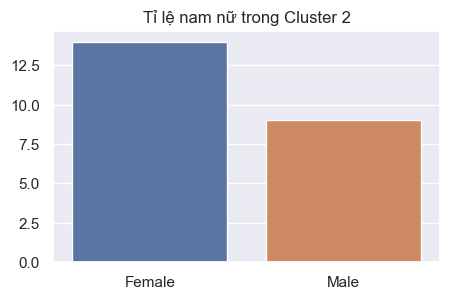

In [480]:
genders = X2.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (5,3))
sns.barplot(x = genders.index, y=genders.values)
plt.title("Tỉ lệ nam nữ trong Cluster 2")
plt.show()

# Xét cụm 4

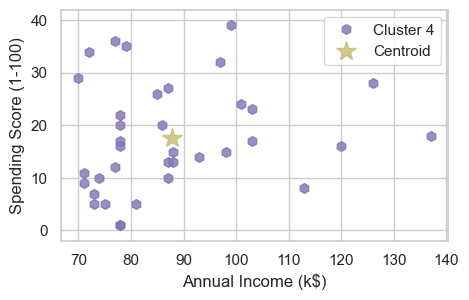

In [534]:
X3 = X[labels == 3, :]
plt.figure(figsize = (5,3))
plt.plot(X3[:, 0], X3[:, 1], 'mh', markersize = 7, alpha = .8,label = "Cluster 4")
plt.plot(centers[3, 0], centers[3, 1], 'y*', markersize = 15, alpha = .8,label = "Centroid")
plt.axis('equal')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.plot()
plt.legend()
plt.show()

Text(0, 0.5, 'Số lượng')

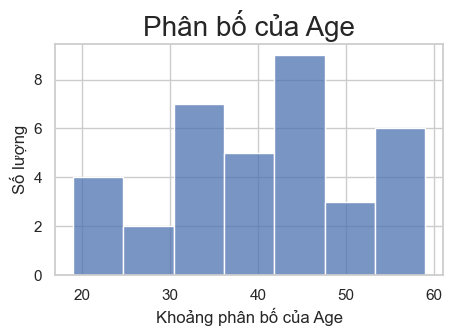

In [535]:
X3 = df1[df1['Cluster'] == 3]
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(X3['Age'])
plt.title('Phân bố của Age', fontsize = 20)
plt.xlabel('Khoảng phân bố của Age')
plt.ylabel('Số lượng')

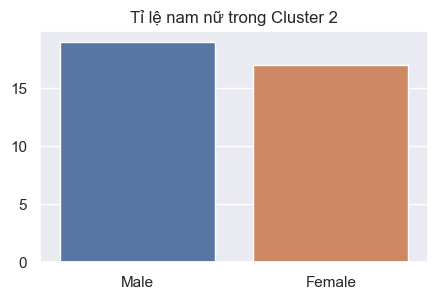

In [536]:
genders = X3.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (5,3))
sns.barplot(x = genders.index, y=genders.values)
plt.title("Tỉ lệ nam nữ trong Cluster 2")
plt.show()

# Xét cụm 5

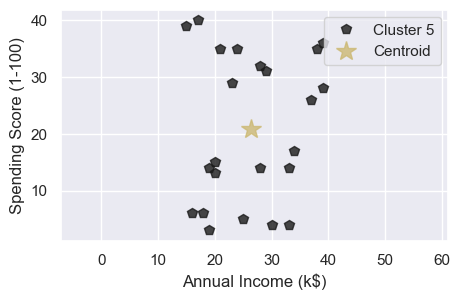

In [537]:
X4 = X[labels == 4, :]
plt.figure(figsize = (5,3))
plt.plot(X4[:, 0], X4[:, 1], 'kp', markersize = 7, alpha = .8,label = "Cluster 5")
plt.plot(centers[4, 0], centers[4, 1], 'y*', markersize = 15, alpha = .8,label = "Centroid")
plt.axis('equal')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.plot()
plt.legend()
plt.show()

Text(0, 0.5, 'Số lượng')

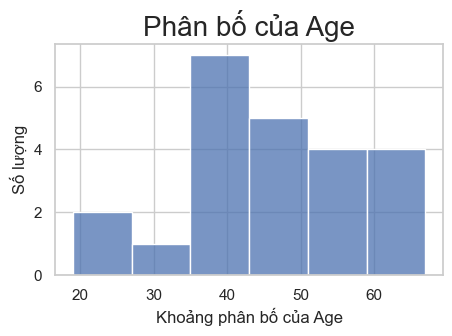

In [542]:
X4 = df1[df1['Cluster'] == 4]
plt.figure(figsize = (5, 3))
sns.set(style = 'whitegrid')
sns.histplot(X4['Age'])
plt.title('Phân bố của Age', fontsize = 20)
plt.xlabel('Khoảng phân bố của Age')
plt.ylabel('Số lượng')

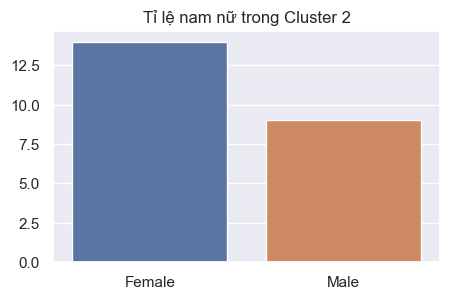

In [543]:
genders = X4.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (5,3))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Tỉ lệ nam nữ trong Cluster 2")
plt.show()